###Build 1

In [ ]:
import numpy as np 
np.random.seed(0)
x = 1 + 2 * np.random.normal(0, 1, 1000) #mean 0 sd 1 1000 samples 
y = x + 1.5 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(0, 3, 1000)
#x,y

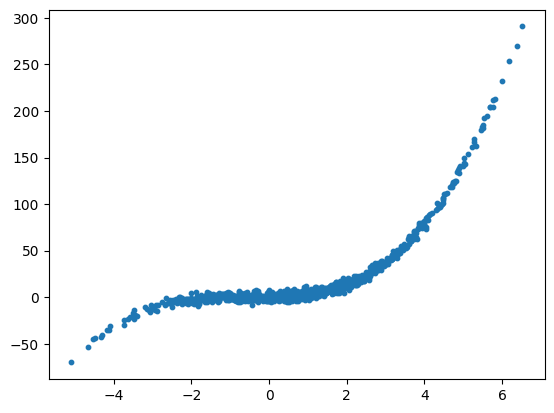

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(x, y, s=10)
plt.show()

Train-Valiidation-Test Split
*60:20:20*

In [ ]:
from sklearn.model_selection import train_test_split 

x = x[:, np.newaxis]
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #20% testing and 80% training now
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #80% training divided in 60:20 or 3:1 ratio (test:val) 80*0.25 or 1/4= 20% val and 60% (80*(3/4)) training now 

Training a Simple Regression Model 

In [ ]:
from sklearn.linear_model import LinearRegression 
 
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y_train)
#r-squared score for training and validation 
print("Degree 1- Training Error : ",lin_reg_1.score(X_train, y_train))
print("Degree 1- Validation Error: ",lin_reg_1.score(X_val, y_val ))

Degree 1- Training Error :  0.6112766542009314
Degree 1- Validation Error:  0.578092525888924


Training Polynormial Regression Models

Degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

poly_regr = PolynomialFeatures(degree = 2)

#Transform the input data to polynomial features
X_poly2 = poly_regr.fit_transform(X_train)
X_poly_val2 = poly_regr.fit_transform(X_val)

lin_reg_2 = LinearRegression()
lin_reg_2 = lin_reg_2.fit(X_poly2, y_train)

#r-squared score for training and validation 
print("Degree 2- Training Error : ",lin_reg_2.score(X_poly2, y_train))
print("Degree 2- Validation Error: ",lin_reg_2.score(X_poly_val2, y_val ))


Degree 2- Training Error :  0.8901821639950546
Degree 2- Validation Error:  0.8567139925783426


Significant performance improvement for degree 2 polynomial from degree 1. 

Degree 3

In [ ]:
poly_regr = PolynomialFeatures(degree = 3)

#Transform the input data to polynomial features
X_poly3 = poly_regr.fit_transform(X_train)
X_poly_val3 = poly_regr.fit_transform(X_val)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y_train)

#r-squared score for training and validation 
print("Degree 3- Training Error : ",lin_reg_3.score(X_poly3, y_train))
print("Degree 3- Validation Error: ",lin_reg_3.score(X_poly_val3, y_val ))

Degree 3- Training Error :  0.9941068693023871
Degree 3- Validation Error:  0.9941018868235563


Further improvement for degree 3 from 2!

Experimenting with Degree 20 

In [ ]:
poly_regr = PolynomialFeatures(degree = 20)

#Transform the input data to polynomial features
X_poly20 = poly_regr.fit_transform(X_train)
X_poly_val20 = poly_regr.fit_transform(X_val)

lin_reg_20 = LinearRegression()
lin_reg_20.fit(X_poly20, y_train)

#r-squared score for training and validation 
print("Degree 20- Training Error : ",lin_reg_20.score(X_poly20, y_train))
print("Degree 20- Validation Error: ",lin_reg_20.score(X_poly_val20, y_val ))

Degree 20- Training Error :  0.9941886044079431
Degree 20- Validation Error:  0.6595307262581366


Training performance has improved slightly but validation performance has worsened significantly! Reason: Overfitting to the training data. 
Hyper-parameter tuning needs to be done to select the ideal degree at which validation error is satisfactory.  

Plotting Results

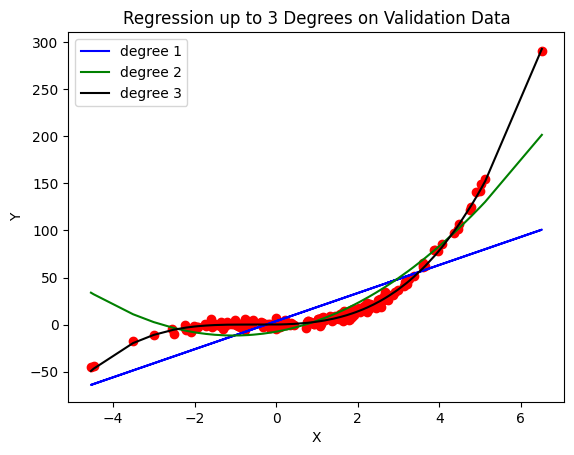

In [ ]:
plt.scatter(X_val, y_val, color = "red")

#degree 1
plt.plot(X_val, lin_reg_1.predict(X_val), color="blue", label="degree 1") 

#degree 2
x2, y2 = zip(*sorted(zip(X_val, lin_reg_2.predict(X_poly_val2)), key=lambda x: x[0]))#sorting the predicted values for easy visualization
plt.plot(x2, y2, color = "green", label="degree 2")

#degree 3
x3, y3 = zip(*sorted(zip(X_val, lin_reg_3.predict(X_poly_val3)), key=lambda x: x[0]))
plt.plot(x3, y3, color = "black", label="degree 3")

plt.title("Regression up to 3 Degrees on Validation Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Evaluate Final Performance 

In [ ]:
poly_regr = PolynomialFeatures(degree = 3)
X_poly_test_3 = poly_regr.fit_transform(X_test)
lin_reg_3.score(X_poly_test_3, y_test)

0.9943846230082006

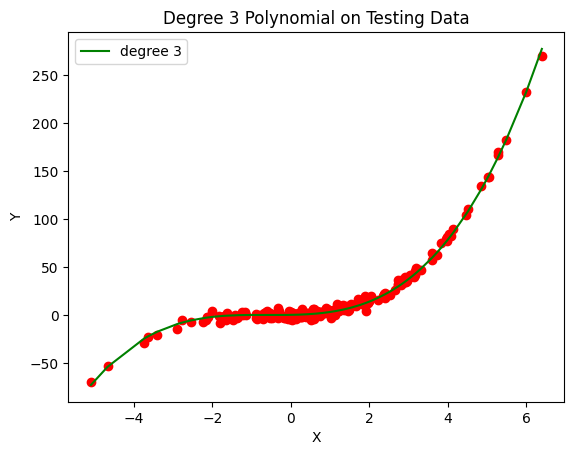

In [ ]:
plt.scatter(X_test, y_test, color="red")

#degree 3
x3_test, y3_test = zip(*sorted(zip(X_test, lin_reg_3.predict(X_poly_test_3)), key=lambda x: x[0]))
plt.plot(x3_test, y3_test, color = "green", label="degree 3")

plt.title("Degree 3 Polynomial on Testing Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

###Build 2

In [ ]:
import pandas as pd
df2=pd.read_csv("position_salaries.csv")

In [ ]:
import matplotlib.pyplot as plt

#A simpler real-world application 

#No train-test split

#[[]] is to select values as a 2d array 
x=df2[["Level"]] 
y=df2[["Salary"]]

Training a Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

#Degree 1
lin_reg_1=LinearRegression()
lin_reg_1.fit(x, y)
print(x)
print("\nDegreee 1- Training Error : ",lin_reg_1.score(x,y))

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10

Degreee 1- Training Error :  0.6690412331929895


Training Polynomial Regression Models of  Degrees 2, 3 and 4 and Computing R-Squared Scores 


In [ ]:
#Degree 2
from sklearn.preprocessing import PolynomialFeatures

poly_regr= PolynomialFeatures(degree=2)
X_train2= poly_regr.fit_transform(x)

lin_reg_2= LinearRegression()
lin_reg_2.fit(X_train2, y)

print(X_train2)
print("\nDegreee 2- Training Error : ",lin_reg_2.score(X_train2,y))

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]

Degreee 2- Training Error :  0.9162082221443942


In [ ]:
#Degree 3
poly_regr= PolynomialFeatures(degree=3)
X_train3= poly_regr.fit_transform(x)

lin_reg_3= LinearRegression()
lin_reg_3.fit(X_train3, y)

print(X_train3) 
print("\nDegreee 3- Training Error : ",lin_reg_3.score(X_train3,y))

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]

Degreee 3- Training Error :  0.9812097727913366


In [ ]:
#Degree 4
poly_regr= PolynomialFeatures(degree=4)
X_train4= poly_regr.fit_transform(x)

lin_reg_4= LinearRegression()
lin_reg_4.fit(X_train4, y)

np.set_printoptions(suppress=True) #to print as integers
print(X_train4) 
print("\nDegreee 4- Training Error : ",lin_reg_4.score(X_train4,y))

[[    1.     1.     1.     1.     1.]
 [    1.     2.     4.     8.    16.]
 [    1.     3.     9.    27.    81.]
 [    1.     4.    16.    64.   256.]
 [    1.     5.    25.   125.   625.]
 [    1.     6.    36.   216.  1296.]
 [    1.     7.    49.   343.  2401.]
 [    1.     8.    64.   512.  4096.]
 [    1.     9.    81.   729.  6561.]
 [    1.    10.   100.  1000. 10000.]]

Degreee 4- Training Error :  0.9973922891706614


Performance Vizualization

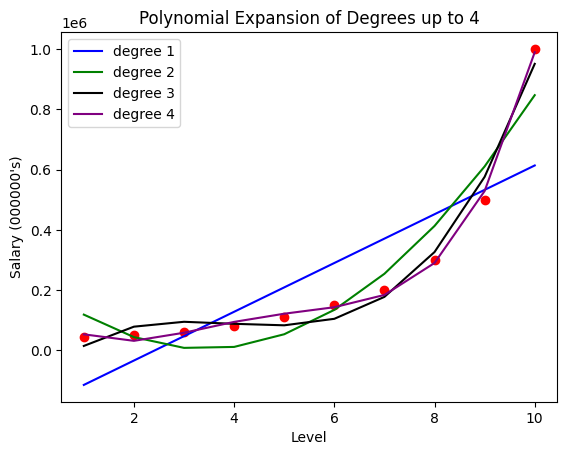

In [ ]:
plt.scatter(x, y, color="red")

#degree 1
plt.plot(x, lin_reg_1.predict(x), color="blue", label="degree 1")

#degree 2
plt.plot(x, lin_reg_2.predict(X_train2), color="green", label="degree 2")

#degree 3
plt.plot(x, lin_reg_3.predict(X_train3), color="black", label="degree 3")

#degree 4
plt.plot(x, lin_reg_4.predict(X_train4), color="purple", label="degree 4")

plt.title("Polynomial Expansion of Degrees up to 4")
plt.xlabel("Level")
plt.ylabel("Salary (000000's)")
plt.legend()
plt.show()